### sklearn.tree.DecisionTreeClassifier
* DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                                 test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred=dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도: 0.9333


In [2]:
dt_clf.feature_importances_
# feature_importances_ 를 찍어보고 많이 쓰이는 것을 확인

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### sklearn.tree.export_graphviz
* export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=graphviz#sklearn.tree.export_graphviz

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names,
               impurity=True, filled=True)

In [5]:
pip install graphviz

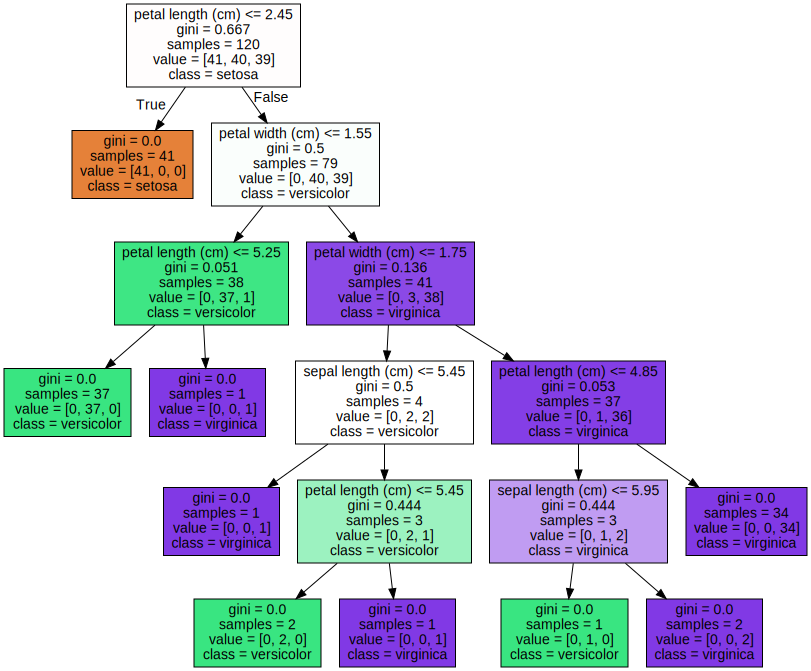

In [6]:
import graphviz

with open('tree.dot') as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### max_depth=3

In [7]:
dt_clf=DecisionTreeClassifier(max_depth=3, random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                                 test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred=dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


예측정확도: 0.9333


In [8]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree_max_depth_3.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names,
               impurity=True, filled=True, )

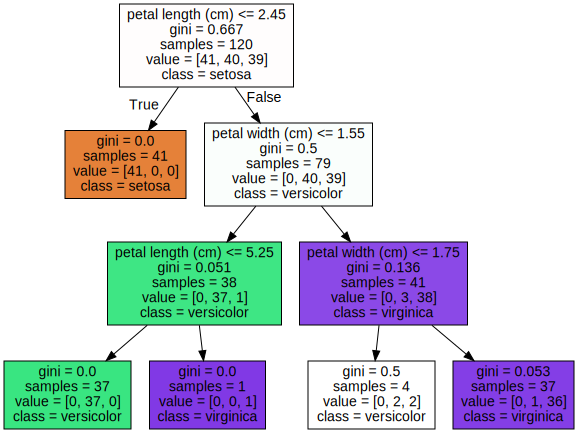

In [9]:
import graphviz

with open('tree_max_depth_3.dot') as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### min_samples_split=4

In [10]:
dt_clf=DecisionTreeClassifier(min_samples_split=4, random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                                 test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred=dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


예측정확도: 0.9333


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree_min_samples_split_4.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names,
               impurity=True, filled=True, )

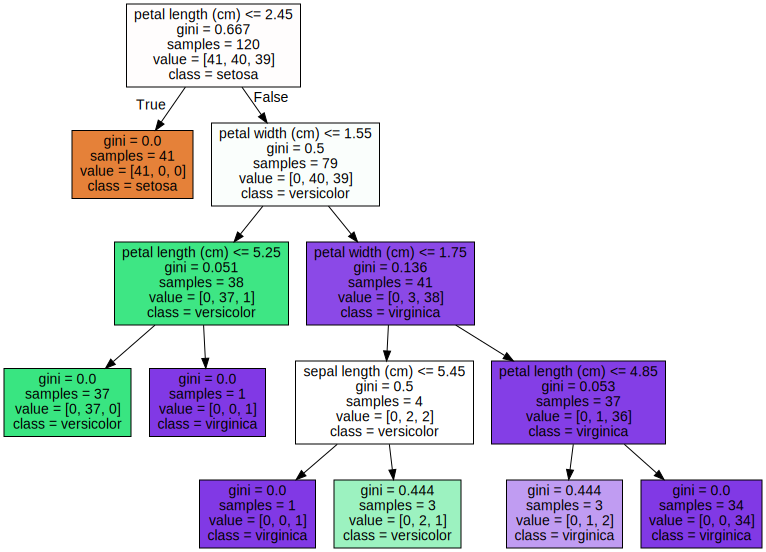

In [12]:
import graphviz

with open('tree_min_samples_split_4.dot') as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### min_samples_leaf=4

In [13]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                                 test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred=dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


예측정확도: 0.9333


In [14]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree_min_samples_leaf_4.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names,
               impurity=True, filled=True, )

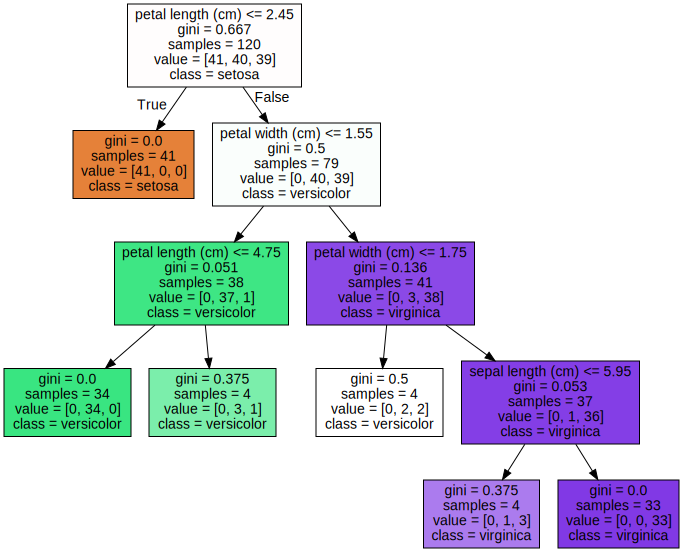

In [15]:
import graphviz

with open('tree_min_samples_leaf_4.dot') as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

Decision Tree 를 활용한 사용자 행동 인식

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("human_activity.csv")
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [18]:
df.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


In [19]:
X_df=df.iloc[:,0:10]
X_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610
...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471


In [20]:
label=df.loc[:,'Activity']
label

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

encorder = LabelEncoder()
y= encorder.fit_transform(label)

y

array([2, 2, 2, ..., 5, 5, 5])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,
                                        y, test_size=0.2, random_state=110)

In [23]:
X_df['label']=y

In [24]:
X_df['label'].value_counts()

0    537
2    532
3    496
1    491
5    471
4    420
Name: label, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도:0.664407
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [26]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.698758
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}


In [27]:
pred=grid_cv.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(pred, y_test)
accuracy

0.6644067796610169

In [29]:
best_dt_clf=DecisionTreeClassifier(max_depth=10, random_state=120)
best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=120)

In [30]:
best_dt_clf.feature_importances_

array([0.05457163, 0.04023396, 0.02714145, 0.09409686, 0.06975981,
       0.05493746, 0.08250169, 0.07836478, 0.04798479, 0.45040757])

In [31]:
import seaborn as sns

ftr_importances_=best_dt_clf.feature_importances_
X_df.columns

ftr_importances_=pd.Series(ftr_importances_, index=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X'])

In [32]:
ftr_importances_

tBodyAcc-mean()-X    0.054572
tBodyAcc-mean()-Y    0.040234
tBodyAcc-mean()-Z    0.027141
tBodyAcc-std()-X     0.094097
tBodyAcc-std()-Y     0.069760
tBodyAcc-std()-Z     0.054937
tBodyAcc-mad()-X     0.082502
tBodyAcc-mad()-Y     0.078365
tBodyAcc-mad()-Z     0.047985
tBodyAcc-max()-X     0.450408
dtype: float64

In [33]:
ftr_importances_ = ftr_importances_.sort_values(ascending=False)
ftr_importances_

tBodyAcc-max()-X     0.450408
tBodyAcc-std()-X     0.094097
tBodyAcc-mad()-X     0.082502
tBodyAcc-mad()-Y     0.078365
tBodyAcc-std()-Y     0.069760
tBodyAcc-std()-Z     0.054937
tBodyAcc-mean()-X    0.054572
tBodyAcc-mad()-Z     0.047985
tBodyAcc-mean()-Y    0.040234
tBodyAcc-mean()-Z    0.027141
dtype: float64

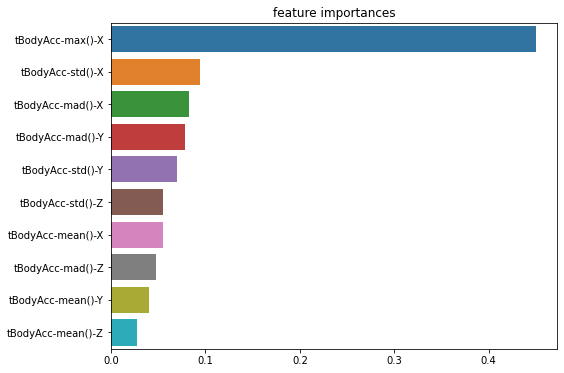

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.title('feature importances')
sns.barplot(x=ftr_importances_, y=ftr_importances_.index)

plt.show()

In [35]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [36]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:4f}', format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

c:\users\phw91\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting 분류기 정확도:{0:4f} 0.9473684210526315
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


c:\users\phw91\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


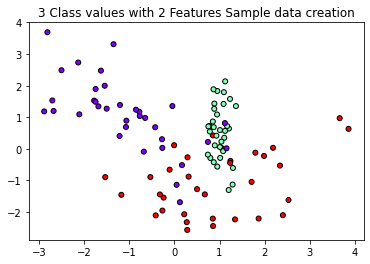

In [41]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1],marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [50]:
import numpy as np

def visualize_boundary(model, X, y):
    fig, ax=plt.subplots()
    
    ax.scatter(X[:, 0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model. fit(X,y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                                  levels=np.arange(n_classes +1) -0.5,
                                   cmap='rainbow', clim=(y.min(), y.max()),
                                   zorder=1)
    

C:\Users\phw91\AppData\Local\Temp\ipykernel_25908\286035206.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


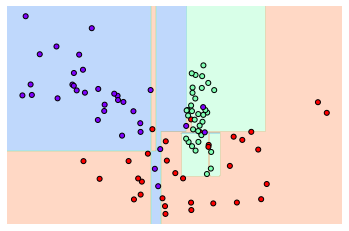

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

train_test_split(iris_data.data, iris_data.target,
                 test_size =0.3, random_state =10)

NameError: name 'iris_data' is not defined

In [2]:
print("hello")

hello
